Este código se asegura de que las advertencias generadas por el código Python se ignoren si no se han establecido opciones de advertencia personalizadas en el sistema.

**`import sys`**: Este paquete proporciona acceso a algunas variables y funciones relacionadas con el sistema. En este caso, se importa para permitir la configuración de opciones relacionadas con las advertencias y la supresión de advertencias en el código.

**`import warnings`**: El paquete `warnings` es parte de la biblioteca estándar de Python y se utiliza para controlar las advertencias emitidas por el intérprete. Permite personalizar cómo se manejan las advertencias en el código.

**El bloque `if not sys.warnoptions**:` verifica si la lista `sys.warnoptions` está vacía. Esta lista contiene las opciones relacionadas con las advertencias configuradas en el sistema. Si está vacía, significa que no se han establecido opciones de advertencia personalizadas.

**`warnings.simplefilter('ignore')`**: Si la lista `sys.warnoptions` está vacía, se utiliza `warnings.simplefilter('ignore')` para configurar el manejo de advertencias. Esto establece que todas las advertencias se ignorarán, lo que significa que no se mostrarán en la salida estándar cuando se ejecuta el código.


In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

**`import tensorflow as tf`**: Importa la biblioteca TensorFlow, que es una biblioteca de código abierto ampliamente utilizada para el aprendizaje automático y la inteligencia artificial.

**`import numpy as np`**: Importa la biblioteca NumPy y la renombra como "np". NumPy es una biblioteca esencial para trabajar con matrices y arreglos multidimensionales en Python, lo que es común en tareas de aprendizaje automático.

**`import matplotlib.pyplot as plt`**: Importa la biblioteca Matplotlib y la renombra como "plt". Matplotlib se utiliza para crear gráficos y visualizaciones de datos.

**`import seaborn as sns`**: Importa la biblioteca Seaborn, que es una extensión de Matplotlib y se utiliza para crear gráficos estadísticos atractivos.

**`import pandas as pd`**: Importa la biblioteca Pandas y la renombra como "pd". Pandas es una biblioteca ampliamente utilizada para la manipulación y análisis de datos tabulares.

**`from sklearn.preprocessing import MinMaxScaler`**: Importa la clase `MinMaxScaler` del paquete `sklearn.preprocessing`. Esta clase se utiliza para escalar datos numéricos en un rango específico, comúnmente entre 0 y 1.

**from datetime import datetime`**: Importa la clase `datetime` del paquete `datetime`. Esta clase se utiliza para trabajar con fechas y horas en Python.

**`from datetime import timedelta`**: Importa la clase `timedelta` del paquete `datetime`. `timedelta` se utiliza para representar una duración de tiempo específica.

**`from tqdm import tqdm`**: Importa la función `tqdm` del paquete `tqdm`, que se utiliza para mostrar barras de progreso en bucles iterativos.

**`sns.set()`**: Establece la configuración predeterminada de Seaborn, que afectará la apariencia de las gráficas generadas con Seaborn.

**`tf.compat.v1.random.set_random_seed(1234)`**: Establece una semilla de generación de números aleatorios para TensorFlow. Esto asegura que los resultados sean reproducibles en un contexto de aprendizaje automático.

Esto es una configuración inicial típica para trabajar con TensorFlow, manipular datos con NumPy y Pandas, y visualizar resultados con Matplotlib y Seaborn. También se establece una semilla de generación de números aleatorios para TensorFlow para garantizar la reproducibilidad de los resultados.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

Permite insertar la data

In [4]:
df = pd.read_csv('/content/GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-17,99.519997,101.769997,99.510002,100.779999,100.779999,23311600
1,2022-10-18,103.940002,104.220001,100.650002,101.389999,101.389999,21610500
2,2022-10-19,100.699997,101.658997,99.635002,100.290001,100.290001,21573700
3,2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
4,2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28988700


Este fragmento de código realiza algunas operaciones de procesamiento de datos utilizando la biblioteca Pandas y el objeto `MinMaxScaler` de scikit-learn.

**`minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32'))`**: Aquí se crea una instancia de `MinMaxScaler` y se ajusta a los datos en la columna 4 de un DataFrame `df`. Esto se hace utilizando el método `.fit()`, que calcula los valores mínimos y máximos necesarios para escalar los datos en el rango [0, 1]. Los datos se convierten a tipo `float32` antes de aplicar el escalado.

**`df_log = minmax.transform(df.iloc[:, 4:5].astype('float32'))`**: Luego, los datos en la columna 4 de `df` se escalan utilizando el objeto `minmax` previamente ajustado. El método `.transform()` realiza el escalado de los datos y devuelve un nuevo array con los valores escalados.

**`df_log = pd.DataFrame(df_log)`**: El array escalado se convierte nuevamente en un DataFrame de Pandas y se almacena en la variable `df_log`. Esto es útil si deseas realizar más operaciones de procesamiento o análisis de datos en los datos escalados.

**`df_log.head()`**: Por último, se muestra la cabecera del DataFrame `df_log` para inspeccionar los primeros registros de datos escalados.


In [5]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.297028
1,0.307507
2,0.288610
3,0.292733
4,0.309054


# Split train and test
I will cut the dataset to train and test datasets,

Train dataset derived from starting timestamp until last 30 days
Test dataset derived from last 30 days until end of the dataset
So we will let the model do forecasting based on last 30 hours, and we will going to repeat the experiment for 10 times. You can increase it locally if you want, and tuning parameters will help you by a lot.

Se está dividiendo un DataFrame `df_log` en conjuntos de entrenamiento y prueba para su uso en un contexto de aprendizaje automático.

**`test_size = 30`**: Se define el tamaño del conjunto de prueba, que es de 30 registros. Esto significa que se utilizarán los últimos 30 registros de `df_log` como datos de prueba.

**`simulation_size = 10`**: Se define el tamaño de la simulación, que es de 10. Esta variable podría usarse en un contexto más amplio del programa para controlar el número de simulaciones o experimentos a realizar.

**`df_train = df_log.iloc[:-test_size]`**: Se crea un DataFrame `df_train` que contiene todos los datos de `df_log` excepto los últimos 30 registros, como se especificó en `test_size`. Estos datos se utilizarán para entrenar un modelo de aprendizaje automático.

**`df_test = df_log.iloc[-test_size:]`**: Se crea un DataFrame `df_test` que contiene los últimos 30 registros de `df_log`. Estos datos se reservan para evaluar el rendimiento del modelo de aprendizaje automático después del entrenamiento.

**`df.shape, df_train.shape, df_test.shape`**: Aquí, se muestran las dimensiones de los DataFrames originales `df`, el conjunto de entrenamiento `df_train` y el conjunto de prueba `df_test`. Esto permite verificar y comparar las formas de estos conjuntos de datos.





In [6]:
test_size = 30
simulation_size = 10

df_train = df_log.iloc[:-test_size]
df_test = df_log.iloc[-test_size:]
df.shape, df_train.shape, df_test.shape

((250, 7), (220, 1), (30, 1))

**`class Model`**: Esta es una clase que define un modelo de red neuronal recurrente (RNN) con una capa oculta LSTM (Long Short-Term Memory). Los parámetros del constructor son:
   - `learning_rate`: Tasa de aprendizaje para el entrenamiento del modelo.
   - `num_layers`: Número de capas LSTM en el modelo.
   - `size`: Tamaño de entrada de la secuencia de datos.
   - `size_layer`: Tamaño de las capas LSTM.
   - `output_size`: Tamaño de la capa de salida.
   - `forget_bias`: Valor de olvido de la celda LSTM (valor predeterminado: 0.1).

 **`calculate_accuracy(real, predict)`**: Esta función toma dos listas de valores, `real` y `predict`, y calcula la precisión del modelo. Primero, ajusta los valores sumando 1 para evitar divisiones por cero, luego calcula la precisión como 1 menos la raíz cuadrada de la media de los cuadrados de las diferencias entre `real` y `predict`. Finalmente, se multiplica por 100 y se devuelve el resultado en porcentaje.

 **`anchor(signal, weight)`**: Esta función toma una secuencia de valores `signal` y aplica un suavizado exponencial ponderado con el parámetro de `weight`. El suavizado exponencial ponderado se utiliza para suavizar una serie de tiempo o señal. La función devuelve una lista de valores suavizados.



In [7]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.BasicRNNCell(size_layer)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )

def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

Este fragmento de código establece varias variables que se utilizan en el entrenamiento de un modelo de aprendizaje automático.

**`num_layers = 1`**: Define el número de capas en el modelo de red neuronal. En este caso, se establece en 1, lo que significa que el modelo tiene una sola capa.

**`size_layer = 128`**: Establece el tamaño de las capas en el modelo de red neuronal. Las capas del modelo tendrán 128 unidades o neuronas.

**`timestamp = 5`**: Define el número de pasos de tiempo o intervalos que se utilizarán en la secuencia de datos. Esto significa que el modelo tomará una secuencia de 5 pasos de tiempo como entrada para hacer predicciones.

**`epoch = 300`**: Indica la cantidad de épocas o iteraciones que se realizarán durante el entrenamiento del modelo. Cada época representa un ciclo completo a través de los datos de entrenamiento.

**`dropout_rate = 0.8`**: Establece la tasa de dropout, que es una técnica de regularización que se utiliza para prevenir el sobreajuste en el modelo. Un valor de 0.8 significa que se desactivará el 80% de las neuronas durante el entrenamiento para evitar el sobreajuste.

**`future_day = test_size`**: Define el número de días en el futuro para los cuales se realizarán predicciones. En este caso, se establece igual al tamaño del conjunto de prueba (`test_size`), lo que indica que se harán predicciones para los próximos 30 días.

**`learning_rate = 0.01`**: Establece la tasa de aprendizaje, que controla el tamaño de los pasos que se toman durante el entrenamiento del modelo. Un valor de 0.01 es una tasa de aprendizaje moderada.




In [8]:
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
future_day = test_size
learning_rate = 0.01

Este fragmento de código define una función llamada `forecast` que implementa un modelo de predicción de series temporales utilizando redes neuronales LSTM (Long Short-Term Memory).

1. Se crea un modelo de red neuronal secuencial utilizando Keras. El modelo consta de dos capas LSTM (una con `return_sequences=True` y otra sin) y una capa densa (fully connected) que predice los valores futuros. El modelo se compila con una función de pérdida de error cuadrático medio (`'mean_squared_error'`) y el optimizador Adam.

2. Se inicializa una lista `date_ori` con fechas y se crea una barra de progreso (`pbar`) para controlar el entrenamiento del modelo a lo largo de múltiples épocas.

3. La función realiza un bucle a través de las épocas de entrenamiento y, en cada época, divide los datos de entrenamiento en lotes de tamaño `timestamp` para entrenar el modelo en lotes secuenciales.

4. Se utiliza `model.train_on_batch` para entrenar el modelo en cada lote y se registra la pérdida en `total_loss`. La barra de progreso muestra la pérdida promedio.

5. Luego, se configura el número de días futuros para los cuales se realizarán predicciones (`future_day`). Se inicializa un arreglo `output_predict` con ceros y se comienza a generar predicciones.

6. El bucle `for` predice los valores de las series de tiempo utilizando el modelo entrenado y llena `output_predict` con las predicciones.

7. Si no se pueden llenar todos los días futuros en bloques de tamaño `timestamp`, se completan con predicciones individuales.

8. Finalmente, se invierte la transformación Min-Max en `output_predict`, se aplica un suavizado a los valores de predicción y se devuelven las predicciones correspondientes al conjunto de prueba (`test_size`) en la variable `deep_future`.

In [30]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
from tqdm import tqdm

def forecast():
    model = Sequential()
    model.add(LSTM(size_layer, input_shape=(timestamp, df_log.shape[1]), return_sequences=True))
    model.add(LSTM(size_layer, return_sequences=True))
    model.add(Dense(df_log.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')

    date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc='train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
          index = min(k + timestamp, df_train.shape[0] - 1)
          batch_x = np.zeros((1, 5, 1))
          batch_x[0, :index - k, 0] = df_train.iloc[k : index, :].values.reshape(-1)
          batch_y = np.zeros((1, 5, 1))
          batch_y[0, :index - k, 0] = df_train.iloc[k + 1 : index + 1, :].values.reshape(-1)
          loss = model.train_on_batch(batch_x, batch_y)
          total_loss.append(loss)
          pbar.set_postfix(cost=np.mean(total_loss))

    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0].values
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits = model.predict(df_train.iloc[k : k + timestamp, :].values.reshape(1, timestamp, -1))
        output_predict[k + 1 : k + timestamp + 1] = out_logits[0]

    if upper_b != df_train.shape[0]:
        out_logits = model.predict(df_train.iloc[upper_b:, :].values.reshape(1, df_train.shape[0] - upper_b, -1))
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits[0]
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days=1))

    init_value = out_logits[0]

    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits = model.predict(o.reshape(1, timestamp, -1))
        # Almacena solo la última predicción en la posición adecuada
        output_predict[-future_day + i, 0] = out_logits[0, -1, 0]
        date_ori.append(date_ori[-1] + timedelta(days=1))

    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.3)

    return deep_future[-test_size:]

Este fragmento de código ejecuta múltiples simulaciones de predicción de series temporales utilizando la función `forecast` que definiste previamente.

1. `results = []`: Se crea una lista vacía llamada `results` que se utilizará para almacenar los resultados de las simulaciones de predicción.

2. Se inicia un bucle `for` que se ejecuta `simulation_size` veces. `simulation_size` es la variable que estableciste anteriormente con un valor de 10, lo que significa que se realizarán 10 simulaciones en total.

3. En cada iteración del bucle, se muestra un mensaje en la consola indicando el número de la simulación actual utilizando `print`. Por ejemplo, en la primera iteración, se mostrará "simulation 1".

4. Luego, se llama a la función `forecast()` para realizar una simulación de predicción de series temporales y el resultado se agrega a la lista `results`.

In [31]:
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1


train loop: 100%|██████████| 300/300 [04:47<00:00,  1.05it/s, cost=0.00225]


1/1 [==============================] - 0s 23ms/step
simulation 2


train loop: 100%|██████████| 300/300 [04:52<00:00,  1.03it/s, cost=0.002]


1/1 [==============================] - 0s 23ms/step
simulation 3


train loop: 100%|██████████| 300/300 [04:50<00:00,  1.03it/s, cost=0.00246]


1/1 [==============================] - 0s 30ms/step
simulation 4


train loop: 100%|██████████| 300/300 [04:48<00:00,  1.04it/s, cost=0.00175]


1/1 [==============================] - 0s 23ms/step
simulation 5


train loop: 100%|██████████| 300/300 [04:48<00:00,  1.04it/s, cost=0.00173]


1/1 [==============================] - 0s 24ms/step
simulation 6


train loop: 100%|██████████| 300/300 [04:48<00:00,  1.04it/s, cost=0.00174]


1/1 [==============================] - 0s 38ms/step
simulation 7


train loop: 100%|██████████| 300/300 [04:49<00:00,  1.04it/s, cost=0.00192]


1/1 [==============================] - 0s 21ms/step
simulation 8


train loop: 100%|██████████| 300/300 [04:57<00:00,  1.01it/s, cost=0.00278]


1/1 [==============================] - 0s 37ms/step
simulation 9


train loop: 100%|██████████| 300/300 [04:49<00:00,  1.04it/s, cost=0.00175]


1/1 [==============================] - 0s 22ms/step
simulation 10


train loop: 100%|██████████| 300/300 [04:52<00:00,  1.02it/s, cost=0.00177]


1/1 [==============================] - 0s 23ms/step


Este fragmento de código calcula la precisión de las predicciones y crea una visualización de las predicciones junto con la tendencia real de los datos de prueba.

1. `accuracies = [calculate_accuracy(df['Close'].iloc[-test_size:].values, r) for r in results]`: Se calcula la precisión de cada resultado de la simulación utilizando la función `calculate_accuracy`. La función compara las predicciones con la tendencia real de los datos de cierre (`'Close'`) del conjunto de prueba y almacena los resultados en la lista `accuracies`.

2. Se crea una figura de Matplotlib para la visualización con un tamaño de 15x5.

3. Se inicia un bucle `for` para iterar a través de los resultados de las simulaciones. Dentro del bucle, se utiliza `plt.plot` para trazar cada conjunto de predicciones (`r`) con una etiqueta que indica "forecast" seguido de un número que identifica la simulación.

4. Se utiliza `plt.plot` nuevamente para trazar la tendencia real de los datos de cierre (`'Close'`) del conjunto de prueba en color negro.

5. Se agrega una leyenda a la figura que muestra las etiquetas de las simulaciones y la tendencia real.

6. Se establece un título para la figura que incluye la precisión promedio calculada a partir de las `accuracies`.

7. Finalmente, se muestra la figura con todas las visualizaciones de predicciones y la tendencia real.

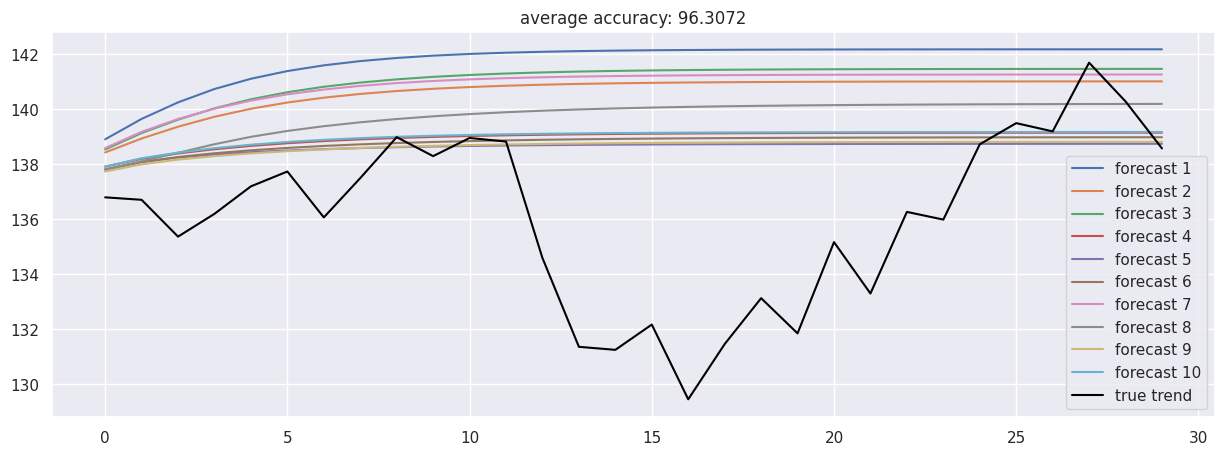

In [32]:
accuracies = [calculate_accuracy(df['Close'].iloc[-test_size:].values, r) for r in results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df['Close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()